In [112]:
#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import sys
import threading
import numpy as np
import heapq
import itertools

In [83]:
class Graph:
    def __init__(self,adj={}):
        self.adj = adj
        self.nodes = []
        self.nodes = list(adj)
        for n in self.adj:
            self.nodes += list(self.adj[n])
        self.nodes = list(set(self.nodes))

        for n in self.nodes:
            if n not in self.adj:
                self.adj[n] = {}

In [311]:
nodes = {'s':{'v':1,'w':4},
         'v':{'t':6,'w':2},
         'w':{'t':3},
         't':{}}

In [312]:
g = Graph(nodes)

In [313]:
g.adj

{'s': {'v': 1, 'w': 4}, 'v': {'t': 6, 'w': 2}, 'w': {'t': 3}, 't': {}}

In [314]:
X=[]
A = {}
B = {}

def greedy(g,X,V):
    val = np.inf
    v_star = ''
    w_star = ''
    
    for v in X:
        for w in V:
            if w in g.adj[v]:
                tmp = A[v] + g.adj[v][w]
                if tmp < val:
                    val = tmp
                    v_star = v
                    w_star = w
    return v_star, w_star                    

def dijkstra(g,ith_node):
    V = g.nodes.copy()
    X.append(ith_node)
    V.remove(ith_node)
    
    A[ith_node] = 0
    B[ith_node] = [ith_node]
    
    while V:
        v,w = greedy(g,X,V)
        X.append(w)
        V.remove(w)
        A[w] = A[v] + g.adj[v][w]
        B[w] = B[v] + [w]
    return A, B    
        
    

In [315]:
class heap:
    
    def __init__(self):
        self.Q = []
        self.V = []
        
        self.entry_finder = {}  
        self.REMOVED = '<removed>'
        self.counter = itertools.count()
       
    def push(self,v,priority=0):
        if v in self.entry_finder:
            self.remove(v)
        count = next(self.counter)
        entry = [priority, count, v]
        self.entry_finder[v] = entry
        heapq.heappush(self.Q, entry)
        self.V.append(v)

    def remove(self,v):
        entry = self.entry_finder.pop(v)
        entry[-1] = self.REMOVED
        self.V.remove(v)

    def pop(self):
        while self.Q:
            priority, count, v = heapq.heappop(self.Q)
            if v is not self.REMOVED:
                del self.entry_finder[v]
                self.V.remove(v)
                return v
        raise KeyError('pop from an empty priority queue')
    
    def update(self,v,priority=0):
        self.remove(v)
        self.push(v,priority)
        
    def is_empty(self):
        if self.V:
            return False
        return True
        

**Dijkstra with Heap**

In [316]:
A = {}
B = {}                    

def dijkstra(g,ith_node):
    A[ith_node] = 0
    h = heap()
    
    for v in g.nodes:
        if v != ith_node:
            A[v] = np.inf
        h.push(v,A[v])

    while not h.is_empty():
        u = h.pop()
        for v in g.adj[u]:
            if v in h.V:
                alt = A[u] + g.adj[u][v]
                if alt < A[v]:
                    h.update(v,alt)
                    A[v] = alt                
                    
    return A        

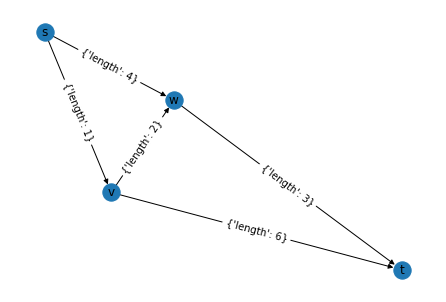

In [317]:
gnx = nx.DiGraph()
for u in g.adj:
    for v in g.adj[u]:
        gnx.add_edge(u,v,length=g.adj[u][v])
pos = nx.spring_layout(gnx)
nx.draw(gnx,pos,with_labels=True)
nx.draw_networkx_edge_labels(gnx,pos)
plt.show()

In [318]:
f = open('dijkstraData.txt','r')
lines = f.readlines()

In [296]:
nodes = {}

In [299]:
for line in lines:
    tmp = line.strip('\t\n').split('\t')
    nodes[int(tmp[0])] = {}
    for pair in tmp[1:]:
        [v,l] = pair.split(',')
        nodes[int(tmp[0])][int(v)] = int(l)
    

In [300]:
g = Graph(nodes)

In [319]:
distances = dijkstra(g,1)

In [310]:
arr = [7,37,59,82,99,115,133,165,188,197]
entry = []
for a in arr:
    entry.append(distances[a])  
print(entry)

[2599, 2610, 2947, 2052, 2367, 2399, 2029, 2442, 2505, 3068]


In [320]:
g.nodes

['w', 's', 'v', 't']